## Example: biweight

We create synthetic test data:

In [9]:
import numpy as np
from wotan import flatten

points = 1000
time = np.linspace(0, 30, points)
flux = 1 + ((np.sin(time) + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise
for i in range(points):
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[300:400] = np.nan  # and a gap

Run wotan:

In [2]:
flatten_lc, trend_lc = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='biweight',
    window_length=0.5,    # The length of the filter window in units of ``time``
    edge_cutoff=0.5,      # length (in units of time) to be cut off each edge.
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    cval=5.0              # Tuning parameter for the robust estimators
    )

Visualize the result:

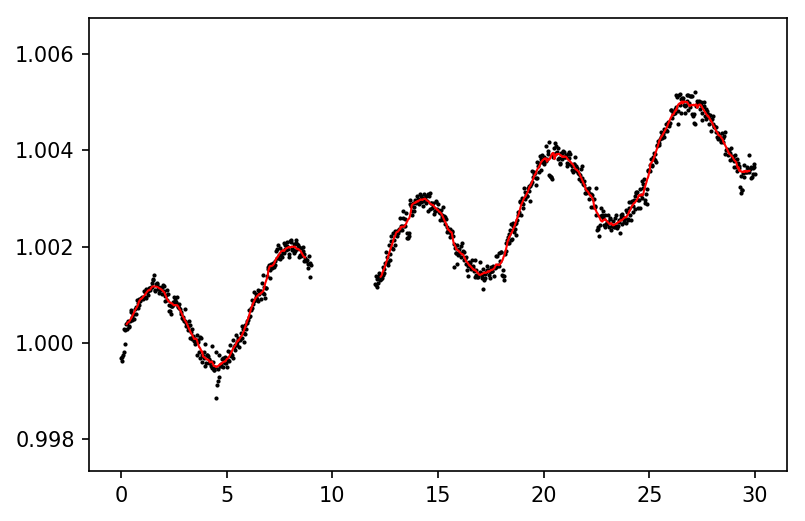

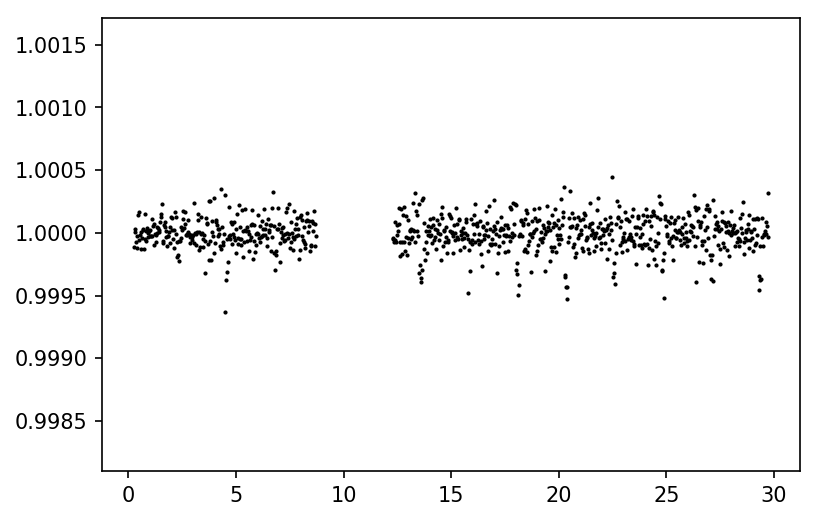

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150

plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc, color='red', linewidth=1)
plt.show();
plt.close()

plt.scatter(time, flatten_lc, s=1, color='black');

Note: The tuning constant ``cval`` is defined as multiples in units of median absolute deviation from the central location. Defaults are usually chosen to achieve high efficiency for Gaussian distributions. For the biweight a ``cval`` of 6 includes data up to 4 standard deviations (6 median absolute deviations) from the central location and has an efficiency of 98%. Another typical value for the biweight is 4.685 with 95% efficiency. Larger values for make the estimate *more efficient* but *less robust*. The default for the biweight in wotan is 5, as it has shown the best results in the transit injection retrieval experiment. 